# RNN experiments

In [7]:
import pandas as pd
import seaborn as sns
import torch.nn as nn
import torch 
import torch.optim as optim 
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.linear_model import LinearRegression
import time
import matplotlib.pyplot as plt 


# Collecting data for our own experimentation

In [8]:
training_data = pd.read_csv('./gnp_data_created.csv')
training_data

,dy,S,mu
0,1.200000,1,1.1283
1,1.100000,1,1.1283
2,1.100000,1,1.1283
3,1.100000,1,1.1283
4,0.635197,1,1.1283
...,...,...,...
95,0.722936,0,-0.2132
96,0.530686,0,-0.2132
97,1.943849,1,1.1283
98,2.442037,1,1.1283


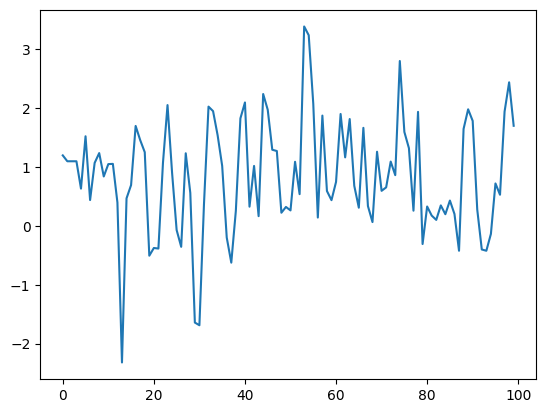

In [9]:
plt.plot(training_data['dy'])

# Breaking into train, test time

Train size: 80, Test size: 20


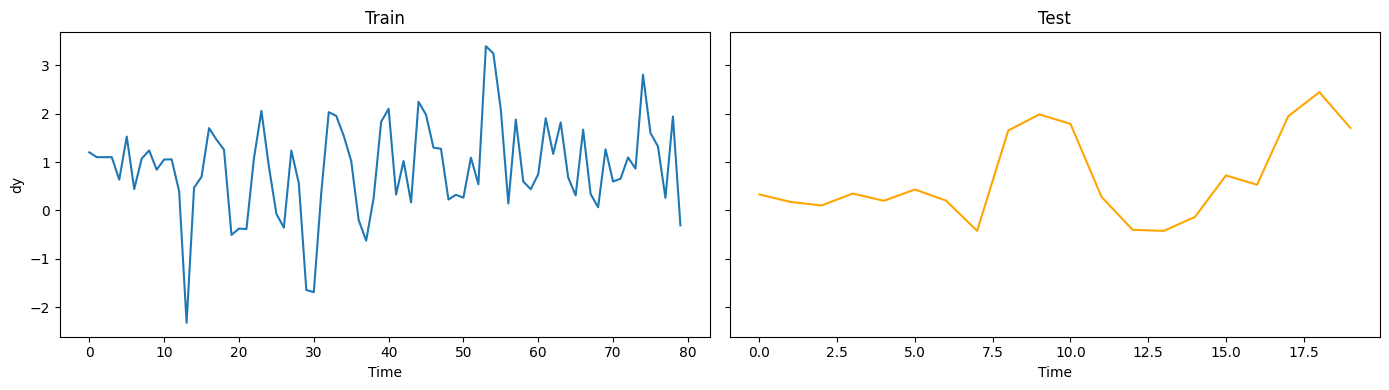

In [10]:
split_idx = int(len(training_data) * 0.8)

train = training_data.iloc[:split_idx].reset_index(drop=True)
test = training_data.iloc[split_idx:].reset_index(drop=True)

print(f"Train size: {len(train)}, Test size: {len(test)}")

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
axes[0].plot(train['dy'])
axes[0].set_title('Train')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('dy')

axes[1].plot(test['dy'], color='orange')
axes[1].set_title('Test')
axes[1].set_xlabel('Time')

plt.tight_layout()
plt.show()

# Markov switching modelling

# AR(4) model

AR(4) Coefficients
  Intercept : 0.7829
  phi_1     : 0.3590
  phi_2     : -0.0605
  phi_3     : -0.2589
  phi_4     : 0.0551

Test RMSE: 0.7145


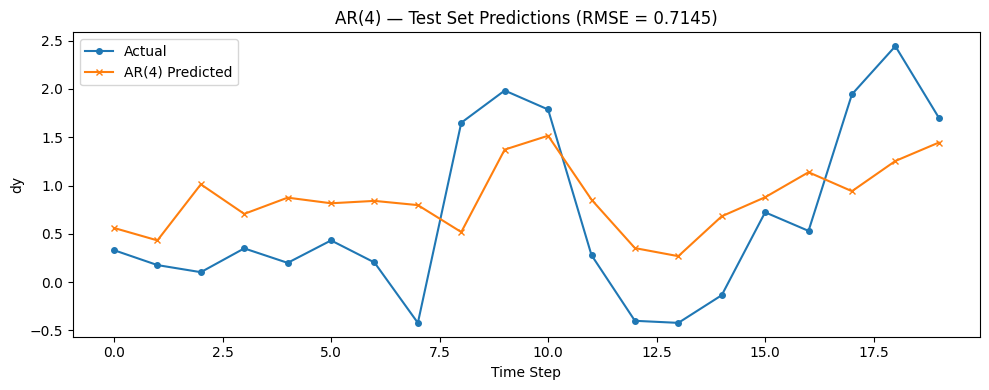

In [11]:
p = 4
dy = training_data['dy'].values

X, y = [], []
for t in range(p, len(dy)):
    X.append([dy[t - i] for i in range(1, p + 1)])
    y.append(dy[t])

X = np.array(X)
y = np.array(y)

# Split aligned with the 80/20 boundary (minus the p initial lags)
train_size = split_idx - p
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

ar_model = LinearRegression()
ar_model.fit(X_train, y_train)

y_pred = ar_model.predict(X_test)

rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print("AR(4) Coefficients")
print(f"  Intercept : {ar_model.intercept_:.4f}")
for i, coef in enumerate(ar_model.coef_):
    print(f"  phi_{i+1}     : {coef:.4f}")
print(f"\nTest RMSE: {rmse:.4f}")

plt.figure(figsize=(10, 4))
plt.plot(y_test, label='Actual', marker='o', markersize=4)
plt.plot(y_pred, label='AR(4) Predicted', marker='x', markersize=4)
plt.title(f'AR(4) — Test Set Predictions (RMSE = {rmse:.4f})')
plt.xlabel('Time Step')
plt.ylabel('dy')
plt.legend()
plt.tight_layout()
plt.show()

# RNN model